# 1. Load basic programs

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import re

from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 2. Load data

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 3. Data cleanup

In [3]:
df_sub = df[:].copy()

In [4]:
len(df_sub.index)

891

In [5]:
df_sub.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Conclusion:
Age & Cabin - missing data  

In [6]:
df_sub.isin([0]).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

Conclusion: All data - check up ok

In [7]:
df_all = df[:].copy() 

df_all.drop(columns='PassengerId', inplace=True)
df_all.drop(columns='Pclass', inplace=True)
df_all.drop(columns='Sex', inplace=True)
df_all.drop(columns='Ticket', inplace=True)
df_all.drop(columns='Name', inplace=True)
df_all.drop(columns='Cabin', inplace=True)
df_all.drop(columns='Embarked', inplace=True)

age_avg = df_all['Age'].mean()
age_std = df_all['Age'].std()
age_null_count = df_all['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
df_all.loc[np.isnan(df_all['Age']), 'Age'] = age_null_random_list
df_all['Age'] = df_all['Age'].astype(int)

df_all['Family'] =  df_all.Parch + df_all.SibSp
df_all['Family']
df_all['Family'].loc[df_all['Family'] >0] = 1
df_all['Family'].loc[df_all['Family'] == 0] = 0
df_all.drop(columns='Parch', inplace=True)
df_all.drop(columns='SibSp', inplace=True)

df_all.isna().sum() 

/home/monika/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Survived    0
Age         0
Fare        0
Family      0
dtype: int64

In [8]:
df_all.describe().round(2)

,Survived,Age,Fare,Family
count,891.00,891.00,891.00,891.00
mean,0.38,29.53,32.20,0.40
std,0.49,13.55,49.69,0.49
min,0.00,0.00,0.00,0.00
25%,0.00,21.00,7.91,0.00
50%,0.00,28.00,14.45,0.00
75%,1.00,37.50,31.00,1.00
max,1.00,80.00,512.33,1.00


Conclusion: 
After initial data clean - up and selection, we can conlude: 
49% ppl survived/ avg age is 30 yo/ youngest had 6M and oldest 80 yo / 49% ppl were travelling with family members


In [9]:
df_all.head(10)

,Survived,Age,Fare,Family
0,0,22,7.2500,1
1,1,38,71.2833,1
2,1,26,7.9250,0
3,1,35,53.1000,1
4,0,35,8.0500,0
5,0,18,8.4583,0
6,0,54,51.8625,0
7,0,2,21.0750,1
8,1,27,11.1333,1
9,1,14,30.0708,1


# 4. Data analysis

In [10]:
df_sub = df[:].copy()

In [11]:
droped_elements = ['PassengerId', 'Embarked', 'Ticket']
df_sub=df_sub.drop(droped_elements, axis = 1)

In [12]:
def kat_clasa(x):
    if x == 1 : return '1st class'
    elif x == 2 : return '2nd class'
    else: return '3rd class'    
df_sub["Pclass"] = [kat_clasa(x) for x in df_sub.Pclass]

In [13]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

df_sub['Title'] = df_sub['Name'].apply(get_title)

def kat_title(x):
    if x == "Miss" : return 'Miss'
    if x == "Mrs" : return 'Mrs'
    elif x == "Mr" : return 'Mr'
    else: return 'Other title'    
df_sub["Title"] = [kat_title(x) for x in df_sub.Title]

df_sub.drop(columns='Name', inplace=True)

In [14]:
df_sub['Has_Cabin'] = df_sub["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
df_sub.drop(columns='Cabin', inplace=True)

In [15]:
df_sub['Family'] =  df_sub.Parch + df_sub.SibSp
# df_sub['Alone']
df_sub['Family'].loc[df_sub['Family'] >0] = 'With Family'
df_sub['Family'].loc[df_sub['Family'] == 0] = 'Alone'

df_sub.drop(columns='Parch', inplace=True)
df_sub.drop(columns='SibSp', inplace=True)

In [16]:
def kat_wiek(x):
    if x < 1 : return 'infant'
    if x < 15 : return 'child'
    if x < 50 : return 'adult'
    if x < 90 : return 'eldery'
    else: return 'unknown'
    
df_sub["Age"] = [kat_wiek(x) for x in df_sub.Age]

In [17]:
df_sub.isna().sum() 

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Title        0
Has_Cabin    0
Family       0
dtype: int64

In [18]:
df_sub.head(10)

,Survived,Pclass,Sex,Age,Fare,Title,Has_Cabin,Family
0,0,3rd class,male,adult,7.2500,Mr,0,With Family
1,1,1st class,female,adult,71.2833,Mrs,1,With Family
2,1,3rd class,female,adult,7.9250,Miss,0,Alone
3,1,1st class,female,adult,53.1000,Mrs,1,With Family
4,0,3rd class,male,adult,8.0500,Mr,0,Alone
5,0,3rd class,male,unknown,8.4583,Mr,0,Alone
6,0,1st class,male,eldery,51.8625,Mr,1,Alone
7,0,3rd class,male,child,21.0750,Other title,0,With Family
8,1,3rd class,female,adult,11.1333,Mrs,0,With Family
9,1,2nd class,female,child,30.0708,Mrs,0,With Family


In [50]:
typy = pd.DataFrame(df_sub.dtypes.value_counts()).reset_index().rename(columns={'index':'Object type',0:'count'})
print(typy)

  Object type  count
0      object      5
1       int64      2
2     float64      1


## Initial analysis

In [20]:
df_sub.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

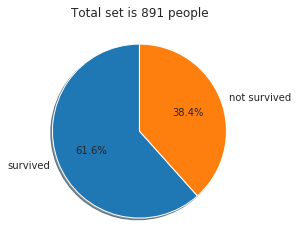

In [21]:
labels = ['survived','not survived']
values = df_sub['Survived'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Total set is 891 people')
plt.show()

Unique characteristic of survived ppl?

In [22]:
df_sub1 = df_sub.query('Survived == 1')

In [23]:
df_sub1.groupby('Pclass')['Pclass'].count()

Pclass
1st class    136
2nd class     87
3rd class    119
Name: Pclass, dtype: int64

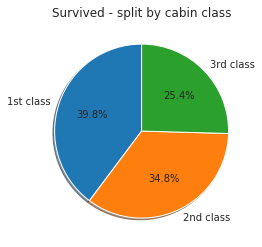

In [24]:
labels = ['1st class','2nd class', '3rd class']
values = df_sub1['Pclass'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Survived - split by cabin class')
plt.show()

In [25]:
df_sub1.groupby('Family')['Family'].count()

Family
Alone          163
With Family    179
Name: Family, dtype: int64

In [26]:
df_sub1.groupby('Age')['Age'].count()

Age
adult      218
child       38
eldery      27
infant       7
unknown     52
Name: Age, dtype: int64

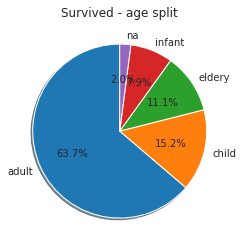

In [27]:
labels = ['adult','child', 'eldery', 'infant', 'na']
values = df_sub1['Age'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Survived - age split')
plt.show()

In [28]:
df_sub1.groupby('Title')['Title'].count()

Title
Miss           127
Mr              81
Mrs             99
Other title     35
Name: Title, dtype: int64

In [29]:
df_sub1.groupby('Sex')['Sex'].count()

Sex
female    233
male      109
Name: Sex, dtype: int64

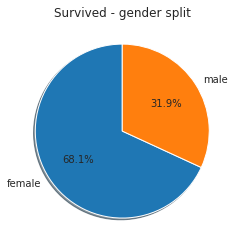

In [30]:
labels = ['female','male']
values = df_sub1['Sex'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Survived - gender split')
plt.show()

Crisp cross- analysis

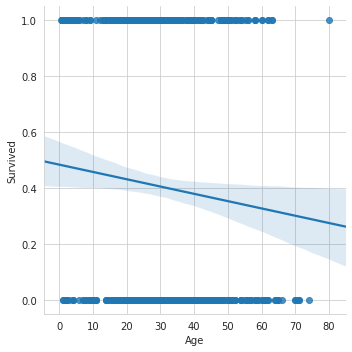

In [31]:
sns.lmplot('Age','Survived',data=df)

Conclusions: Survival rate drops with age increase. Older passengers have lower chance of survival.

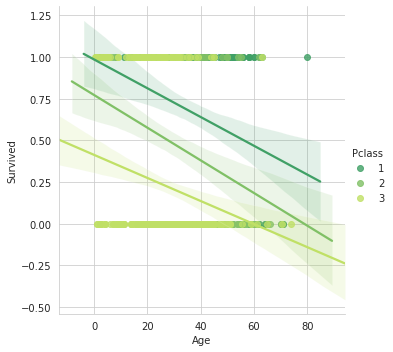

In [32]:
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='summer')

Conclusions: Survival rate drops with age increase. Based on passenger class split is easy to conclude that higher chances of survival are for ones in 1st class. 

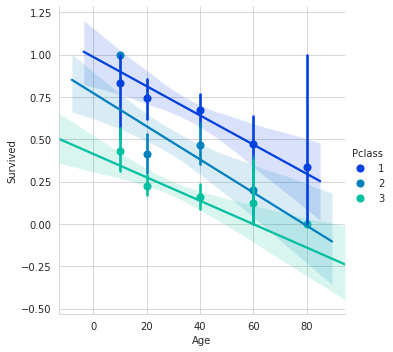

In [33]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter',x_bins=generations)

Conclusions: Based on passenger class split is easy to conclude that higher chances of survival are for ones in 1st class. Please look on very interesting data for 1st class passenger 80 yo.

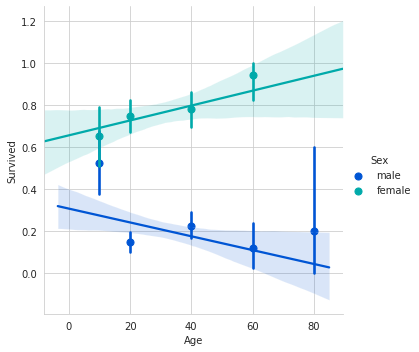

In [34]:
sns.lmplot('Age','Survived',hue='Sex',data=df,palette='winter',x_bins=generations)

Conclusions: Based on passenger gender split is easy to conclude that higher chances of survival are for females where survival rate increase with age. 

## 5. Corelation

In [35]:
df_corr = df[:].copy() 

In [36]:
droped_elements = ['PassengerId', 'Embarked', 'Ticket', 'Name']
df_corr=df_corr.drop(droped_elements, axis = 1)

In [37]:
df_corr.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [38]:
# Gender
df_corr['Sex'] = df_corr['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [39]:
df_corr.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,NaN
1,1,1,0,38.0,1,0,71.2833,C85
2,1,3,0,26.0,0,0,7.9250,NaN
3,1,1,0,35.0,1,0,53.1000,C123
4,0,3,1,35.0,0,0,8.0500,NaN


In [40]:
# Age
age_avg = df_corr['Age'].mean()
age_std = df_corr['Age'].std()
age_null_count = df_corr['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
df_corr.loc[np.isnan(df_corr['Age']), 'Age'] = age_null_random_list
df_corr['Age'] = df_corr['Age'].astype(int)


In [41]:
df_corr.loc[df_corr['Age'] <= 1, 'Age'] = 0
df_corr.loc[(df_corr['Age'] > 1) & (df_corr['Age'] <= 15), 'Age'] = 1
df_corr.loc[(df_corr['Age'] > 15) & (df_corr['Age'] <= 28), 'Age'] = 2
df_corr.loc[(df_corr['Age'] > 28) & (df_corr['Age'] <= 78), 'Age'] = 3
df_corr.loc[df_corr['Age'] > 78, 'Age'] ;


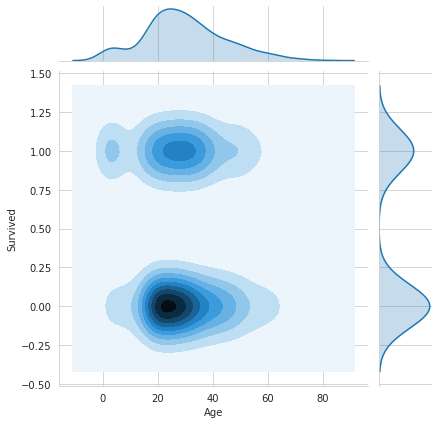

In [42]:
sns.jointplot(x='Age',y='Survived',data=df,kind='kde')

No handles with labels found to put in legend.
/home/monika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


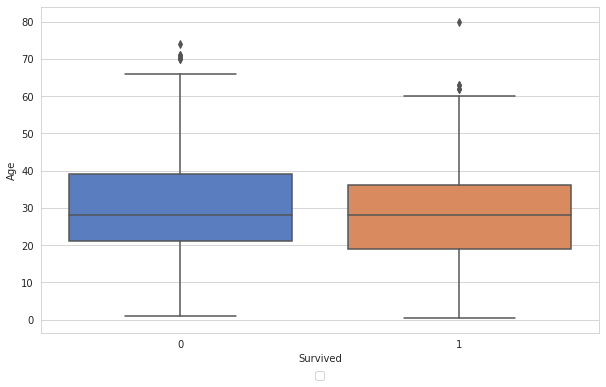

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.set(style="whitegrid")
sns.boxplot(x="Survived", y="Age", data=df, ax = ax, palette = 'muted')

ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.1), 
          ncol=2)
fig.show()

In [44]:
#Parch i Sibling/Spouse
df_corr['Family'] =  df_corr.Parch + df_corr.SibSp
df_corr['Family']
df_corr['Family'].loc[df_corr['Family'] >0] = 1
df_corr['Family'].loc[df_corr['Family'] == 0] = 0
df_corr.drop(columns='Parch', inplace=True)
df_corr.drop(columns='SibSp', inplace=True)

/home/monika/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
#Cabin
df_corr['Booked_Cabin'] = df_corr["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
df_corr.drop(columns='Cabin', inplace=True)

In [46]:
df_corr.head(5)

,Survived,Pclass,Sex,Age,Fare,Family,Booked_Cabin
0,0,3,1,2,7.2500,1,0
1,1,1,0,3,71.2833,1,1
2,1,3,0,2,7.9250,0,0
3,1,1,0,3,53.1000,1,1
4,0,3,1,3,8.0500,0,0


In [47]:
df_corr.isna().sum() 

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Family          0
Booked_Cabin    0
dtype: int64

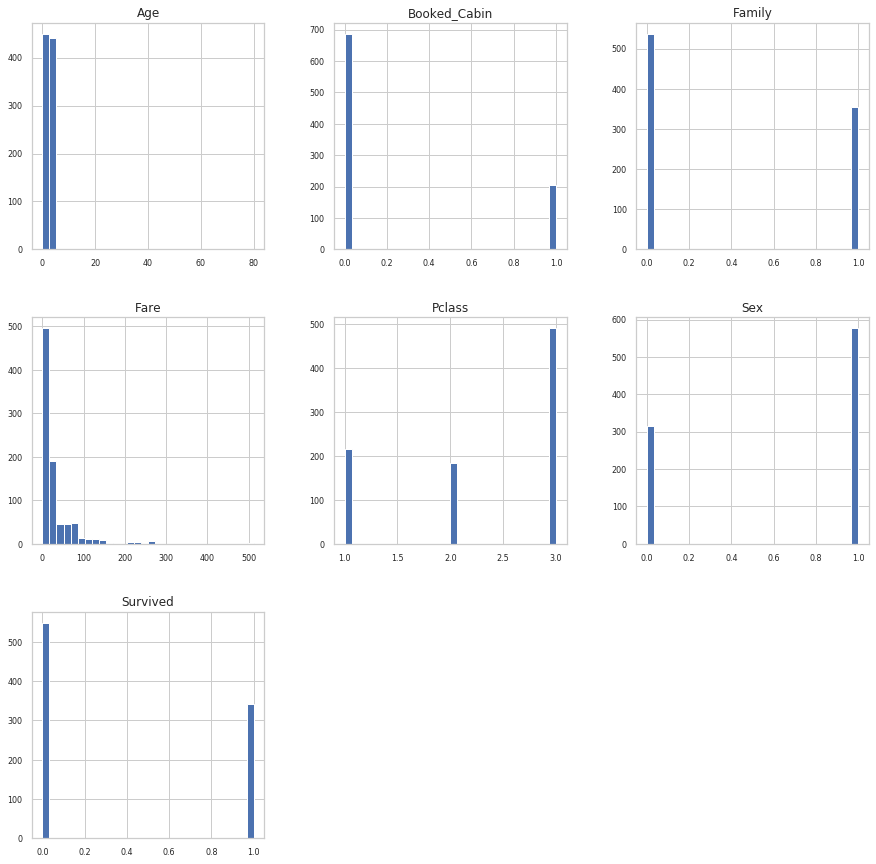

In [48]:
df_corr.hist(figsize=(15, 15), bins=30, xlabelsize=8, ylabelsize=8);

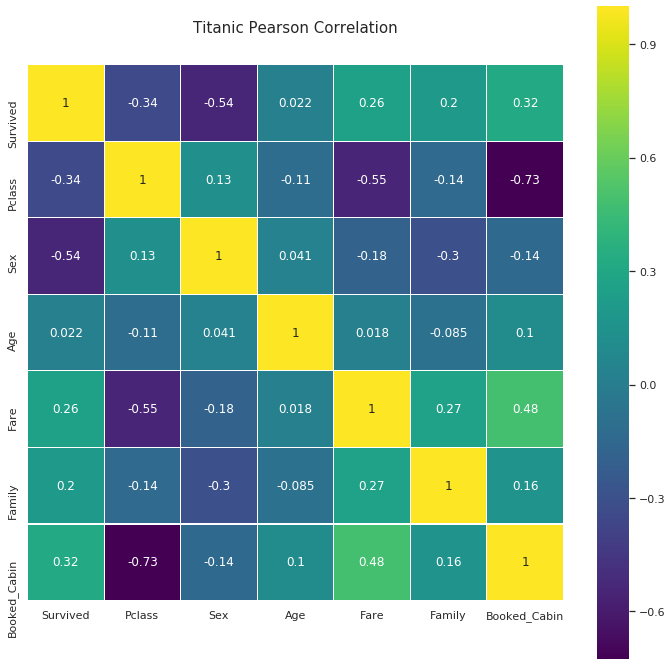

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Titanic Pearson Correlation', y=1.05, size=15)

sns.heatmap(df_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


Conclusions: Highest rate of survival are corelated to: gender, financial status (booked cabin for titanic trip), fare cost, family and passenger class (analysis concluded in point 4)